# Tensorflow Tutorial

Credit: This tutorial is partially adopted from a tutorial used in Berkeley CS 294-112 course

This tutorial will provide a brief overview of the core concepts and functionality of Tensorflow. This tutorial will cover the following:

1. Creating a neural network
2. Performing computations
3. Training a neural network

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

Check the Tensorflow version

In [5]:
tf.__version__


'1.15.3'

In [6]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

## 1. Creating a Neural Network

We create neural network from the scratch here. Below code describes how to create neural network using tensorflow. For given input placeholder, $x$, the output of neural network is computed as follows:

\begin{align}
h1 &= \sigma(x * W0 + b0) \\
h2 &= \sigma(h1 * W1 + b1) \\
out &= h2 * W2 + b2
\end{align}
where $W$ is weight matrix for each hidden layer, $b$ is bias, and $\sigma$ is activation function.


In [15]:
tf.reset_default_graph()

# number of input features
num_features = 5

# number of output actions
num_outputs = 1

# numer of neurons in hidden layer
num_hidden = 32

# create the placeholders
input_ph = tf.placeholder(tf.float32, [None, num_features])

weights_0 = tf.Variable(tf.random_normal([num_features,num_hidden]))
bias_0 = tf.Variable(tf.random_normal([num_hidden]))
weights_1 = tf.Variable(tf.random_normal([num_hidden,num_hidden]))
bias_1 = tf.Variable(tf.random_normal([num_hidden]))
weights_2 = tf.Variable(tf.random_normal([num_hidden,num_outputs]))
bias_2 = tf.Variable(tf.random_normal([num_outputs]))

hidden_layer1 = tf.nn.relu(tf.matmul(input_ph,weights_0)+bias_0)
hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1,weights_1)+bias_1)
output_layer = tf.matmul(hidden_layer2,weights_2)+bias_2


## 2. Performing computations

Tensorflow starts with creating session for 1.X version.


In [16]:
sess = tf.Session()

We can these execute commands by calling sess.run()

In [17]:
a = tf.constant(1.0)
b = tf.constant(2.0)
c = a + b

c_run = sess.run(c)
print(c)
print('c = {}'.format(c_run))

Tensor("add_3:0", shape=(), dtype=float32)
c = 3.0


If we are trying to run an operation with variables, we must first initalize the variables

In [18]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

If we want to run commands with placeholders for inputting data, we specify an addition "feed_dict" term.

In [19]:
numbers = np.random.randn(10,5)

res = sess.run(output_layer, feed_dict={input_ph: numbers})

print(res)

[[ -0.53196734]
 [-37.963474  ]
 [-21.387754  ]
 [-18.46625   ]
 [-36.519405  ]
 [  3.5763748 ]
 [-39.331776  ]
 [-27.67065   ]
 [-58.13487   ]
 [ -9.681015  ]]


## 3. Training a neural network

In this section, we'll train a neural network on a simple regression problem. First of all, let's create data for a 1-dimensional regression problem:


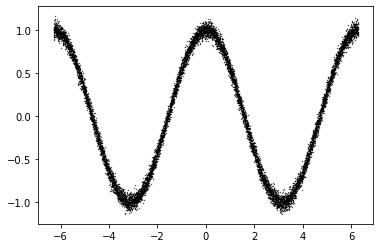

In [20]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.cos(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

The below code creates the inputs, variables, neural network operations, mean-squared-error loss, gradient descent optimizer, and runs the optimizer using minibatches of the data.

In [21]:
tf.reset_default_graph()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])

    num_hidden=32
    num_outputs=1
    num_inputs = input_ph.shape[1].value
    weights_0 = tf.Variable(tf.random_normal([num_inputs,num_hidden]))
    bias_0 = tf.Variable(tf.random_normal([num_hidden]))
    weights_1 = tf.Variable(tf.random_normal([num_hidden,num_hidden]))
    bias_1 = tf.Variable(tf.random_normal([num_hidden]))
    weights_2 = tf.Variable(tf.random_normal([num_hidden,num_outputs]))
    bias_2 = tf.Variable(tf.random_normal([num_outputs]))

    hidden_layer1 = tf.nn.relu(tf.matmul(input_ph,weights_0)+bias_0)
    hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1,weights_1)+bias_1)
    output_layer = tf.matmul(hidden_layer2,weights_2)+bias_2
    

    return input_ph, output_ph, output_layer

input_ph, output_ph, output_pred = create_model()

# create a tensorflow session
sess = tf.Session()

# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# initialize variables
sess.run(tf.global_variables_initializer())

# create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 100
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, '/tmp/model.ckpt')

0000 mse: 3723.336
1000 mse: 0.211
2000 mse: 0.011
3000 mse: 0.005
4000 mse: 0.005
5000 mse: 0.003
6000 mse: 0.004
7000 mse: 0.002
8000 mse: 0.003
9000 mse: 0.003


Now that the neural network is trained, we can use it to make predictions:

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


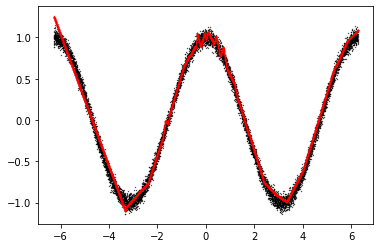

In [22]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, "/tmp/model.ckpt")

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)

Now you know the basics of Tensorflow!
